# **Pertemuan 2: Ekstraksi Fitur: Dari Tepi Hingga Deteksi Wajah**

**Tujuan Sesi:**  
Peserta belajar cara mengekstrak fitur penting dari citra seperti tepi dan bentuk, dan menggunakannya untuk mendeteksi objek kompleks seperti wajah.

## **Pengantar**

<b>NAMA : Muhammad Yusuf</b>    
<b>NIM  : 122140193</b>     

### **Konsep Konvolusi dan Deteksi Tepi**

Dalam pengolahan citra digital, **konvolusi** merupakan operasi penting yang memungkinkan kita untuk memanipulasi fitur visual dari gambar.  
Beberapa penerapannya antara lain:  
- **Blurring (reduksi noise)**: menggunakan kernel untuk meratakan nilai piksel di sekitarnya, sehingga detail halus dan noise berkurang.  
- **Sharpening**: meningkatkan kontras antar piksel agar tepi objek terlihat lebih tajam.  

Selanjutnya, kita akan mengenal **algoritma Canny Edge Detector**, salah satu metode paling populer untuk **menemukan garis batas objek** pada gambar.  
Metode ini bekerja dengan mendeteksi perubahan intensitas yang signifikan, lalu menandai area tersebut sebagai **tepi**.

## **Filter Spasial dan Deteksi Tepi**

**Konvolusi** adalah operasi matematika yang menggabungkan dua fungsi untuk menghasilkan fungsi ketiga. Dalam pengolahan citra, konvolusi digunakan untuk menerapkan **kernel** (matriks kecil) pada setiap piksel gambar.

**Jenis-jenis filter spatial:**
- **Gaussian Blur**: Mengurangi noise dengan meratakan nilai piksel
- **Sharpening**: Meningkatkan kontras tepi untuk membuat gambar lebih tajam
- **Edge Detection**: Mendeteksi perubahan intensitas yang signifikan (tepi objek)

**Canny Edge Detector** adalah algoritma deteksi tepi yang paling populer karena:
1. Mampu mendeteksi tepi dengan akurat
2. Menghasilkan tepi yang tipis (1 piksel)
3. Mengurangi noise dengan baik

> **Pertanyaan:** Apakah kamu sudah melakukan instalasi library `dlib`?

In [17]:
# Import library yang dibutuhkan
import numpy as np  # Untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt  # Untuk visualisasi gambar
import cv2  # OpenCV: library utama untuk pengolahan citra dan aplikasi terkait
import os  # Untuk operasi file dan path
import dlib  # Deteksi wajah & landmark
import requests  # Untuk melakukan permintaan HTTP

# Cek versi library yang diinstal
print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")
print("Versi dlib:", dlib.__version__)

"""
📌 Catatan Penting:
Cara Instal Library
dlib → digunakan untuk deteksi wajah.
   - Instalasi di Windows bisa rumit.
   - Panduan lengkap: https://www.geeksforgeeks.org/python/how-to-install-dlib-library-for-python-in-windows-10/

💡 Disarankan menggunakan versi Python 3.10 atau 3.11 agar kompatibel.
"""

Versi numpy: 1.26.4
Versi matplotlib: 3.10.7
Versi OpenCV: 4.11.0
Versi dlib: 19.22.99


'\n📌 Catatan Penting:\nCara Instal Library\ndlib → digunakan untuk deteksi wajah.\n   - Instalasi di Windows bisa rumit.\n   - Panduan lengkap: https://www.geeksforgeeks.org/python/how-to-install-dlib-library-for-python-in-windows-10/\n\n💡 Disarankan menggunakan versi Python 3.10 atau 3.11 agar kompatibel.\n'

In [18]:
# Panggil file
geo_img = os.path.join(os.getcwd(), 'data', 'popcat-by-pintu.jpg')
img = cv2.imread(geo_img)

# Konversi ke RGB untuk ditampilkan dengan benar di matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

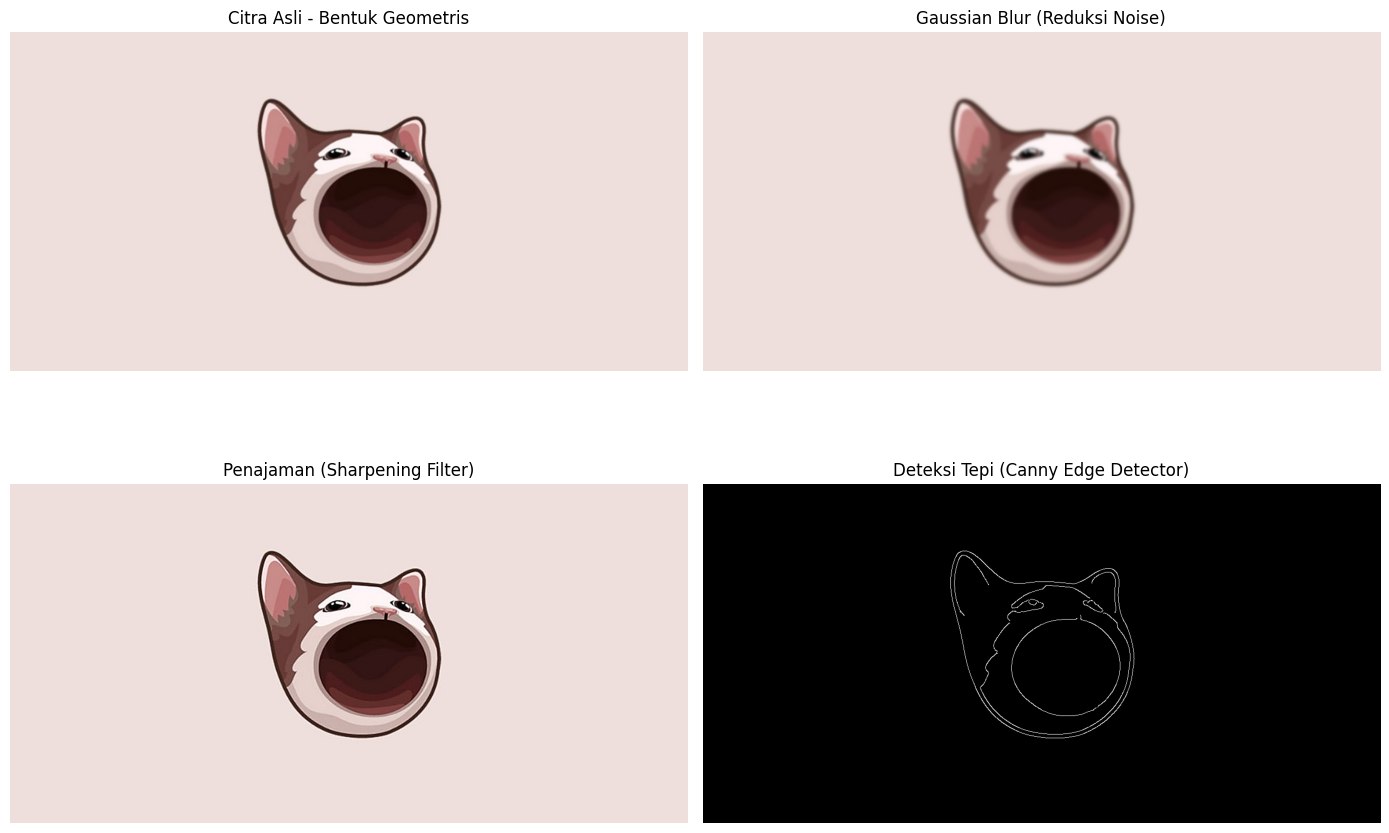

In [19]:
# Gaussian Blur (reduksi noise)
blur = cv2.GaussianBlur(img, (15, 15), 0)
blur_rgb = cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)

# Sharpening (penajaman)
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
sharp = cv2.filter2D(img, -1, kernel_sharp)
sharp_rgb = cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB)

# Deteksi tepi menggunakan Canny
edges = cv2.Canny(blur, 100, 200)

# Susun canvas 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Citra Asli
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Asli - Bentuk Geometris", fontsize=12)
axes[0, 0].axis("off")

# 2. Gaussian Blur
axes[0, 1].imshow(blur_rgb)
axes[0, 1].set_title("Gaussian Blur (Reduksi Noise)", fontsize=12)
axes[0, 1].axis("off")

# 3. Sharpening
axes[1, 0].imshow(sharp_rgb)
axes[1, 0].set_title("Penajaman (Sharpening Filter)", fontsize=12)
axes[1, 0].axis("off")

# 4. Deteksi Tepi Canny
axes[1, 1].imshow(edges, cmap='gray')
axes[1, 1].set_title("Deteksi Tepi (Canny Edge Detector)", fontsize=12)
axes[1, 1].axis("off")

# layout
plt.tight_layout()
plt.show()


### **Penjelasan Filter Spatial**

**Gaussian Blur (`cv2.GaussianBlur`)**:
- Parameter `(15, 15)` adalah ukuran kernel blur
- Semakin besar kernel, semakin blur hasilnya
- Berguna untuk mengurangi noise sebelum deteksi tepi

**Sharpening Filter**:
- Menggunakan kernel `[[0,-1,0], [-1,5,-1], [0,-1,0]]`
- Nilai tengah (5) memperkuat piksel pusat
- Nilai negatif (-1) mengurangi piksel sekitar
- Hasilnya: kontras tepi meningkat

**Canny Edge Detection**:
- Parameter `(100, 200)` adalah threshold rendah dan tinggi
- Piksel dengan gradien > 200 pasti tepi
- Piksel dengan gradien < 100 pasti bukan tepi
- Piksel di antara 100-200 diperiksa koneksinya

### **Menerapkan Canny dengan Threshold Berbeda**

Threshold Canny menentukan sensitivitas deteksi tepi:
- **Threshold rendah (30, 90)**: Sensitif, mendeteksi banyak tepi termasuk noise
- **Threshold sedang (50, 150)**: Seimbang antara detail dan noise
- **Threshold tinggi (100, 200)**: Ketat, hanya tepi kuat yang terdeteksi

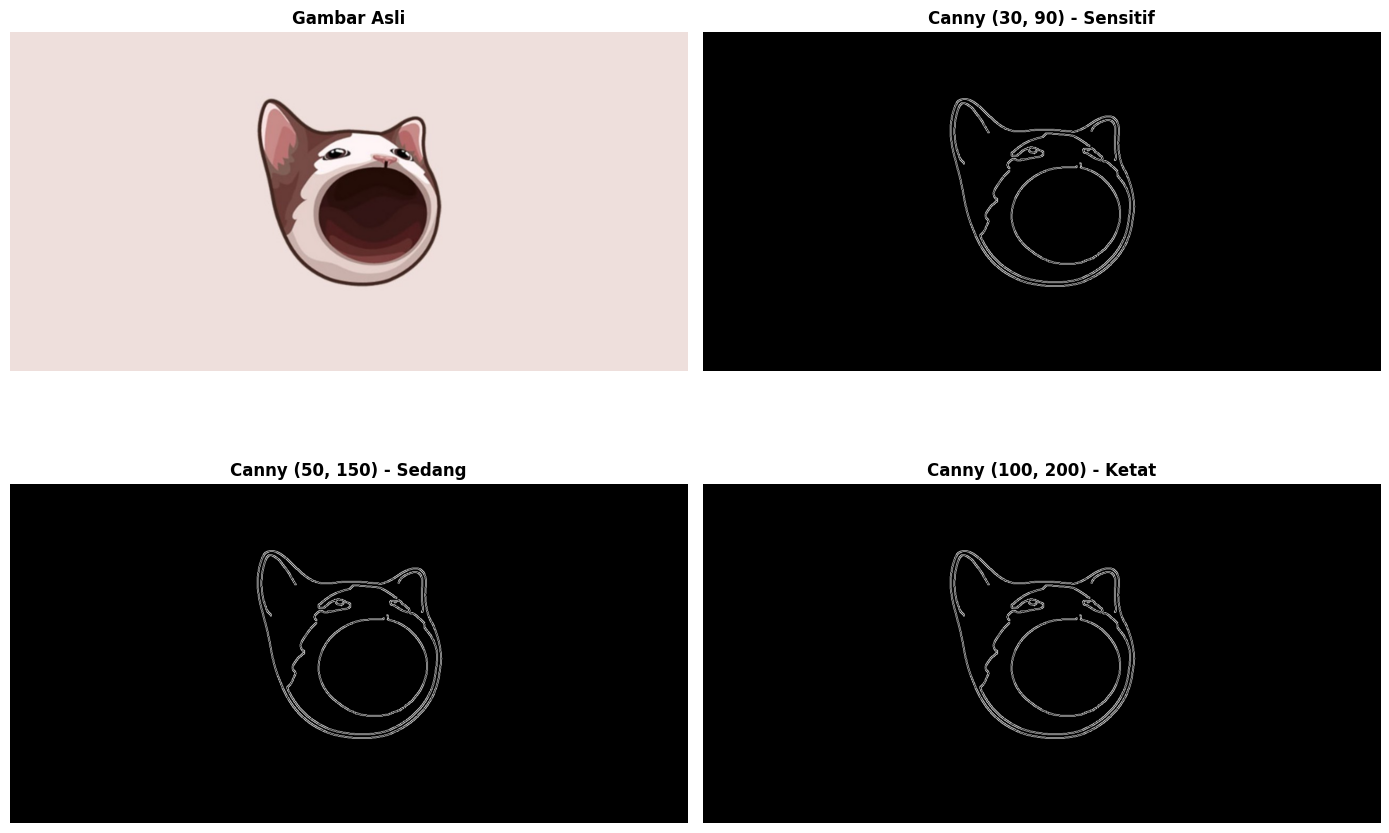

In [20]:
# Preprocessing
img_blur = cv2.GaussianBlur(edges, (5, 5), 0)

# Deteksi tepi Canny dengan berbagai threshold
edges_low = cv2.Canny(img_blur, 30, 90)     
edges_mid = cv2.Canny(img_blur, 50, 150)     
edges_high = cv2.Canny(img_blur, 100, 200)   

# Visualisasi hasil Canny
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0, 0].axis("off")

axes[0, 1].imshow(edges_low, cmap='gray')
axes[0, 1].set_title("Canny (30, 90) - Sensitif", fontsize=12, fontweight='bold')
axes[0, 1].axis("off")

axes[1, 0].imshow(edges_mid, cmap='gray')
axes[1, 0].set_title("Canny (50, 150) - Sedang", fontsize=12, fontweight='bold')
axes[1, 0].axis("off")

axes[1, 1].imshow(edges_high, cmap='gray')
axes[1, 1].set_title("Canny (100, 200) - Ketat", fontsize=12, fontweight='bold')
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

### **Tips memilih threshold:**
- Gambar ber-noise tinggi → gunakan threshold tinggi
- Butuh detail halus → gunakan threshold rendah
- Untuk deteksi kontur → pilih threshold sedang

### **Deteksi Kontur**

**Kontur** adalah kurva yang menghubungkan titik-titik kontinu dengan intensitas warna yang sama. Dalam pengolahan citra, kontur sering digunakan untuk mendeteksi bentuk, ukuran, dan lokasi objek.

Langkah-langkah deteksi kontur:
- **Preprocessing**: Menggunakan Gaussian blur untuk mengurangi noise dan Canny edge detection untuk menemukan tepi.
- **Kontur eksternal**: Menggunakan `cv2.findContours` untuk mendeteksi hanya kontur luar.
- **Filter area**: Menyaring kontur berdasarkan ukuran untuk menghilangkan noise kecil atau objek yang tidak relevan.

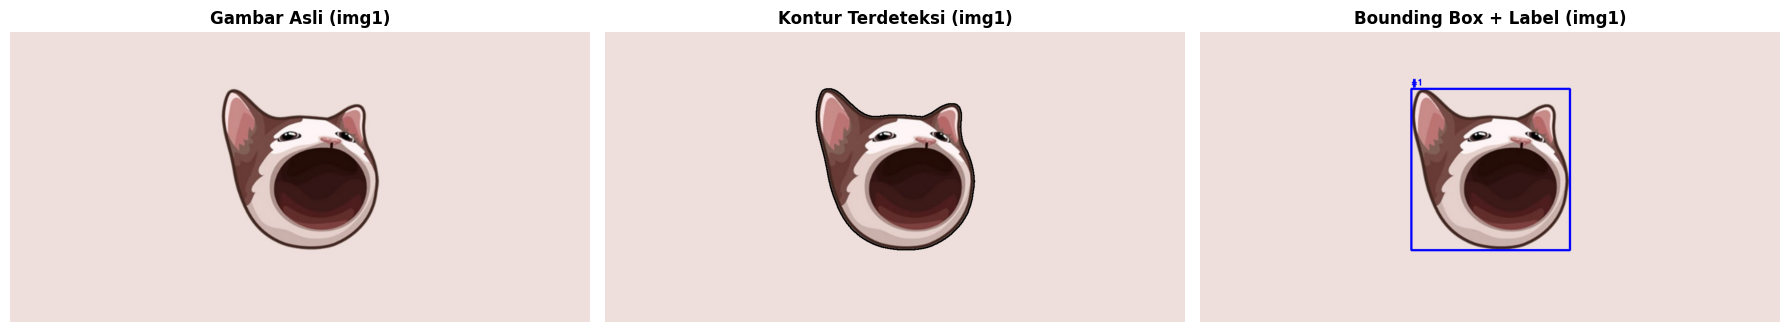

In [21]:
# Deteksi kontur menggunakan cv2.findContours pada img1
contours_img1, hierarchy_img1 = cv2.findContours(edges_mid, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar 1: Kontur dengan warna berbeda
img1_contours = img.copy()
for idx, c in enumerate(contours_img1):
    # Warna berbeda untuk tiap objek
    color = (
        int((idx * 50) % 255),
        int((idx * 100) % 255),
        int((idx * 150) % 255)
    )
    cv2.drawContours(img1_contours, [c], -1, color, 2)

# Gambar 2: Bounding Box
img1_boxes = img.copy()
for idx, c in enumerate(contours_img1):
    # Hitung bounding box
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    
    # Warna berdasarkan ukuran
    if area > 5000:
        color = (255, 0, 0)  # Biru untuk objek besar
        thickness = 3
    elif area > 2000:
        color = (0, 255, 0)  # Hijau untuk objek sedang
        thickness = 2
    else:
        color = (0, 165, 255)  # Orange untuk objek kecil
        thickness = 2
    
    # Gambar rectangle
    cv2.rectangle(img1_boxes, (x, y), (x + w, y + h), color, thickness)
    
    # Tambahkan label
    label = f"#{idx+1}"
    cv2.putText(img1_boxes, label, (x, y-8), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli (img1)", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(img1_contours, cv2.COLOR_BGR2RGB))
axes[1].set_title("Kontur Terdeteksi (img1)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(img1_boxes, cv2.COLOR_BGR2RGB))
axes[2].set_title("Bounding Box + Label (img1)", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

### **Penjelasan**

**Parameter `cv2.findContours()`:**
- **Input**: Gambar biner (hasil Canny)
- `cv2.RETR_EXTERNAL`: Hanya kontur luar (tidak ada kontur di dalam kontur)
- `cv2.CHAIN_APPROX_SIMPLE`: Menyimpan hanya titik ujung garis

**Proses filtering:**
1. Hitung area setiap kontur dengan `cv2.contourArea()`
2. Filter berdasarkan area minimum (hilangkan noise kecil)
3. Filter berdasarkan area maksimum (hilangkan frame gambar)
4. Urutkan dari area terbesar ke terkecil

**Visualisasi hasil:**
- Kontur digambar dengan warna hijau
- Setiap objek memiliki bounding box berwarna berbeda
- Label nomor menunjukkan urutan berdasarkan ukuran

In [22]:
# Muat gambar
desk_img_path = os.path.join(os.getcwd(), 'data', 'cat-by-shutterstock.webp')
img2 = cv2.imread(desk_img_path)

# Ke grayscale
desk_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

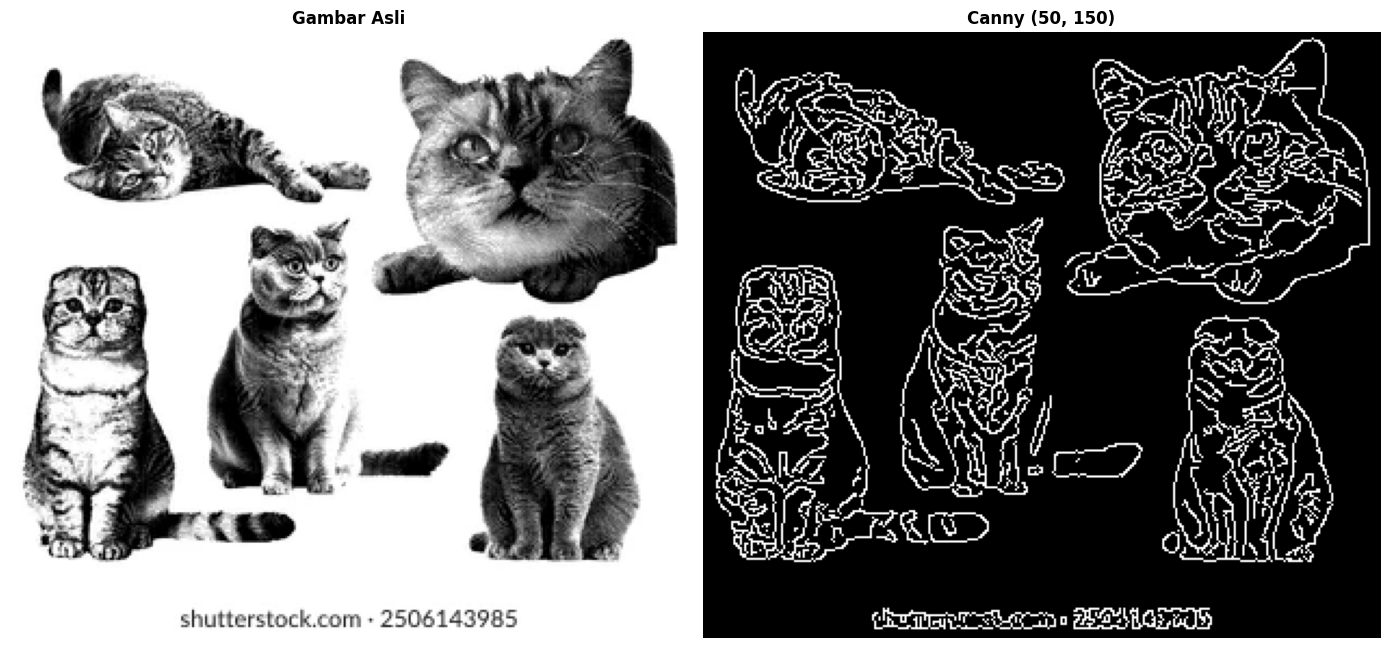

In [23]:
# Preprocessing
desk_blur = cv2.GaussianBlur(desk_gray, (5, 5), 0)

# Deteksi tepi Canny
edges = cv2.Canny(desk_blur, 50, 150)

# Visualisasi hasil Canny
fig, axes = plt.subplots(1, 2, figsize=(14, 10))

axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Canny (50, 150)", fontsize=12, fontweight='bold')
axes[1].axis("off")

plt.tight_layout()
plt.show()

HANDS-ON 2: DETEKSI KONTUR DENGAN cv2.findContours
Total kontur terdeteksi: 7
Kontur setelah filter area: 6


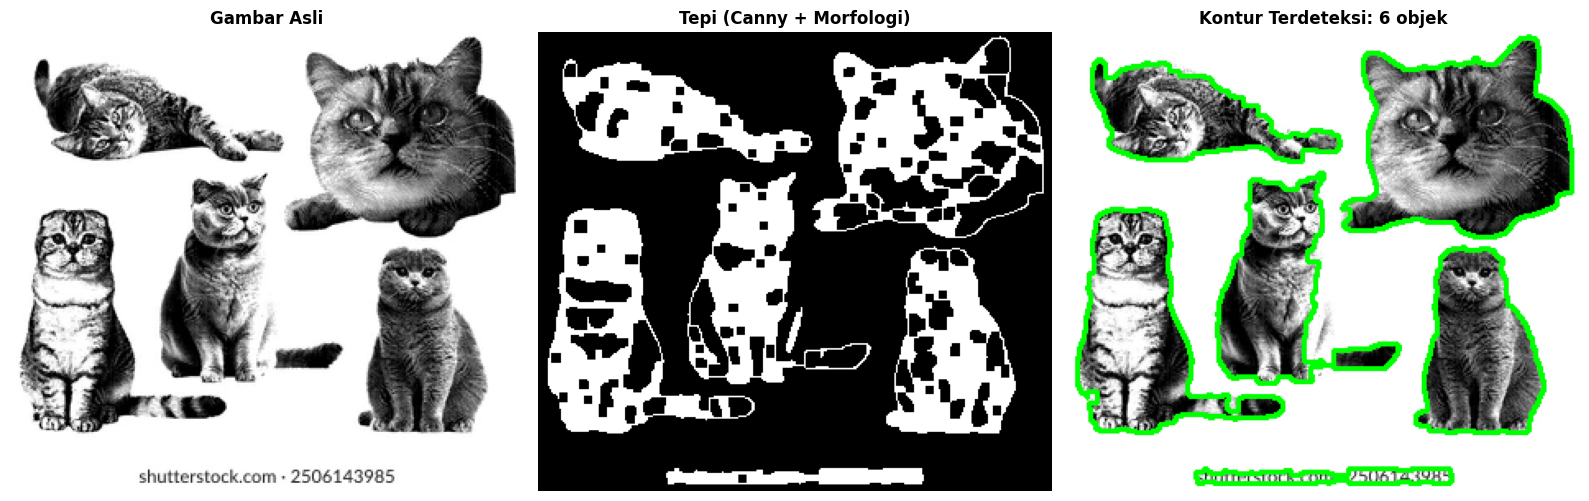

✓ Deteksi kontur berhasil



In [24]:
print("="*60)
print("HANDS-ON 2: DETEKSI KONTUR DENGAN cv2.findContours")
print("="*60)

# Gunakan edges dari Canny
edges = cv2.Canny(desk_blur, 50, 150)

# Morfologi untuk memperbaiki tepi
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Deteksi kontur
contours, hierarchy = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Total kontur terdeteksi: {len(contours)}")

# Filter kontur berdasarkan area
min_area = 200
max_area = desk_gray.shape[0] * desk_gray.shape[1] * 0.8

filtered_contours = []
for c in contours:
    area = cv2.contourArea(c)
    if min_area < area < max_area:
        filtered_contours.append(c)

print(f"Kontur setelah filter area: {len(filtered_contours)}")

# Urutkan berdasarkan area (terbesar dulu)
filtered_contours = sorted(filtered_contours, key=cv2.contourArea, reverse=True)

# Visualisasi kontur
img_contours = img2.copy()
cv2.drawContours(img_contours, filtered_contours, -1, (0, 255, 0), 2)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(edges_closed, cmap='gray')
axes[1].set_title("Tepi (Canny + Morfologi)", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Kontur Terdeteksi: {len(filtered_contours)} objek", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

print("✓ Deteksi kontur berhasil")
print()

### **Penjelasan Sistem Anotasi**

**Tiga jenis anotasi:**

1. **Kontur Warna-warni:**
   - Setiap objek diberi warna berbeda
   - Warna dihitung berdasarkan indeks objek
   - Memudahkan membedakan objek yang berdekatan

2. **Bounding Box + Label:**
   - Kotak pembatas menunjukkan area objek
   - Warna berdasarkan ukuran: biru (besar), hijau (sedang), orange (kecil)
   - Label nomor untuk identifikasi

3. **Kombinasi Lengkap:**
   - Kontur + bounding box + informasi area
   - Memberikan informasi paling lengkap
   - Berguna untuk analisis detail

**Fungsi OpenCV yang digunakan:**
- `cv2.rectangle()`: Menggambar kotak
- `cv2.putText()`: Menambah teks label
- `cv2.contourArea()`: Menghitung luas area
- `cv2.boundingRect()`: Koordinat kotak pembatas

HANDS-ON 3: ANOTASI OBJEK (KONTUR + BOUNDING BOX)


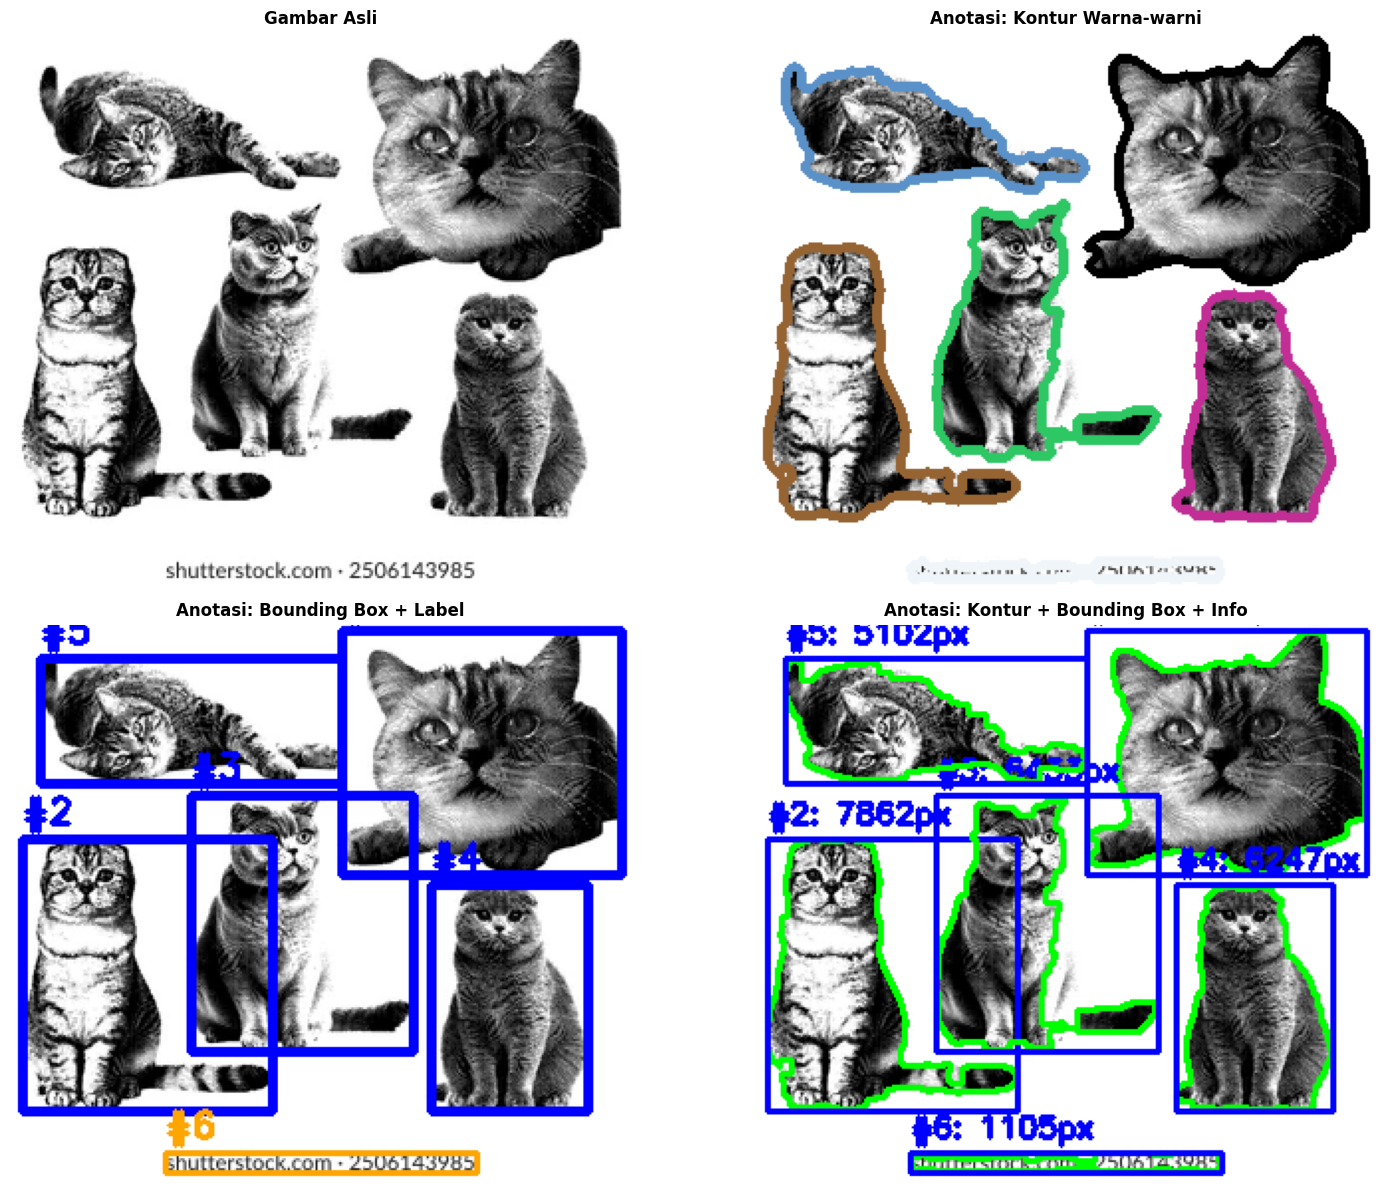

✓ Anotasi objek berhasil

STATISTIK HASIL DETEKSI OBJEK
Total objek terdeteksi: 6

Detail 10 objek terbesar:
No    Area (px)    Ukuran (WxH)    Posisi (x,y)   
------------------------------------------------------------
1     11816        141x123          (167,3)
2     7862         126x137          (6,108)
3     6433         112x129          (91,86)
4     6247         79x114          (212,131)
5     5102         152x63           (15,17)
6     1105         157x10           (78,266)


In [25]:
print("="*60)
print("HANDS-ON 3: ANOTASI OBJEK (KONTUR + BOUNDING BOX)")
print("="*60)

# Gambar 1: Kontur dengan warna berbeda
img_annotated_contours = img2.copy()
for idx, c in enumerate(filtered_contours):
    # Warna berbeda untuk tiap objek
    color = (
        int((idx * 50) % 255),
        int((idx * 100) % 255),
        int((idx * 150) % 255)
    )
    cv2.drawContours(img_annotated_contours, [c], -1, color, 3)

# Gambar 2: Bounding Box
img_annotated_boxes = img2.copy()
for idx, c in enumerate(filtered_contours):
    # Hitung bounding box
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    
    # Warna berdasarkan ukuran
    if area > 5000:
        color = (255, 0, 0)  # Biru untuk objek besar
        thickness = 3
    elif area > 2000:
        color = (0, 255, 0)  # Hijau untuk objek sedang
        thickness = 2
    else:
        color = (0, 165, 255)  # Orange untuk objek kecil
        thickness = 2
    
    # Gambar rectangle
    cv2.rectangle(img_annotated_boxes, (x, y), (x + w, y + h), color, thickness)
    
    # Tambahkan label
    label = f"#{idx+1}"
    cv2.putText(img_annotated_boxes, label, (x, y-8), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Gambar 3: Kombinasi kontur + bounding box + info
img_annotated_full = img2.copy()
for idx, c in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    
    # Gambar kontur
    cv2.drawContours(img_annotated_full, [c], -1, (0, 255, 0), 2)
    
    # Gambar bounding box
    cv2.rectangle(img_annotated_full, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Label detail
    label = f"#{idx+1}: {int(area)}px"
    cv2.putText(img_annotated_full, label, (x, y-8), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Visualisasi anotasi
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title("Gambar Asli", fontsize=12, fontweight='bold')
axes[0, 0].axis("off")

axes[0, 1].imshow(cv2.cvtColor(img_annotated_contours, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("Anotasi: Kontur Warna-warni", fontsize=12, fontweight='bold')
axes[0, 1].axis("off")

axes[1, 0].imshow(cv2.cvtColor(img_annotated_boxes, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("Anotasi: Bounding Box + Label", fontsize=12, fontweight='bold')
axes[1, 0].axis("off")

axes[1, 1].imshow(cv2.cvtColor(img_annotated_full, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title("Anotasi: Kontur + Bounding Box + Info", fontsize=12, fontweight='bold')
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()

print("✓ Anotasi objek berhasil")
print()

print("="*60)
print("STATISTIK HASIL DETEKSI OBJEK")
print("="*60)
print(f"Total objek terdeteksi: {len(filtered_contours)}")
print(f"\nDetail 10 objek terbesar:")
print(f"{'No':<5} {'Area (px)':<12} {'Ukuran (WxH)':<15} {'Posisi (x,y)':<15}")
print("-"*60)

for idx, c in enumerate(filtered_contours[:10]):
    area = cv2.contourArea(c)
    x, y, w, h = cv2.boundingRect(c)
    print(f"{idx+1:<5} {int(area):<12} {w}x{h:<12} ({x},{y})")

if len(filtered_contours) > 10:
    print(f"\n... dan {len(filtered_contours)-10} objek lainnya")

print("="*60)

> **Pertanyaan:** Bagaimana mengoptimalkan kontur agar terdeteksi hanya 4 objek?

## **Deteksi Wajah dengan Haar Cascades**

**Haar Cascade** adalah metode machine learning untuk deteksi objek yang dikembangkan oleh Paul Viola dan Michael Jones. Karakteristik utama:

- Menggunakan **fitur Haar-like** (pola terang-gelap sederhana)
- **Cascade classifier**: Serangkaian classifier lemah yang digabung
- **Cepat**: Dapat berjalan real-time pada webcam
- **Pre-trained**: OpenCV menyediakan model siap pakai

**Keunggulan:**
- Tidak perlu training data sendiri
- Akurasi cukup baik untuk wajah frontal
- Komputasi ringan

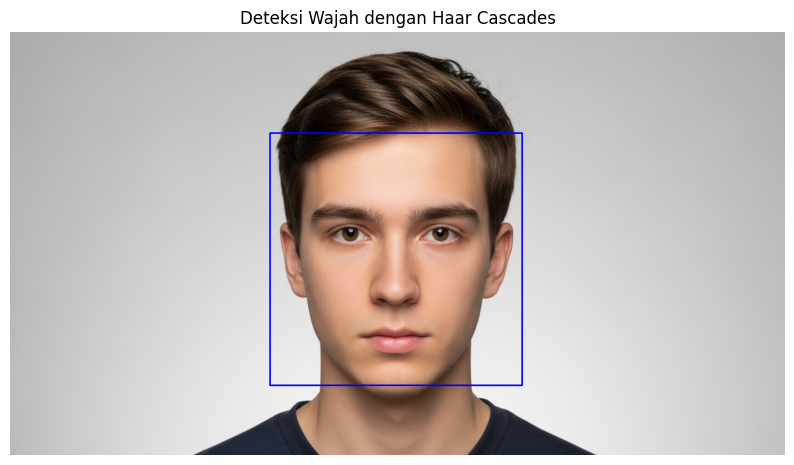

In [26]:
# Load the pre-trained Haar Cascade for face detection
haar_cascade_path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

# Load the image
face_path = os.path.join(os.getcwd(), 'data', 'face.png')
img3 = cv2.imread(face_path)

# Convert the image to grayscale (Haar Cascades work on grayscale images)
gray_face_image = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_face_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img3, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert the image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("Deteksi Wajah dengan Haar Cascades")
plt.axis("off")
plt.show()

### **XML Pra Terlatih OpenCV**

OpenCV menyediakan berbagai model Haar Cascade:
- `haarcascade_frontalface_default.xml`: Wajah tampak depan
- `haarcascade_eye.xml`: Mata
- `haarcascade_smile.xml`: Senyuman
- `haarcascade_profileface.xml`: Wajah profil

File XML berisi ribuan fitur yang sudah dilatih pada jutaan gambar positif dan negatif.

In [27]:
print("="*60)
print("HANDS-ON 4: PERBANDINGAN HAAR CASCADE vs DLIB")
print("="*60)

# Load the pre-trained Haar Cascade for face detection
haar_cascade_path = os.path.join(cv2.data.haarcascades, 'haarcascade_frontalface_default.xml')
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

# Load the image
many_face_path = os.path.join(os.getcwd(), 'data', 'multiple.png')
img_original = cv2.imread(many_face_path)

# Buat copy terpisah untuk setiap metode
img_haar = img_original.copy()
img_dlib = img_original.copy()

# Convert to grayscale for processing
gray_faces = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

print(f"Ukuran gambar: {img_original.shape}")
print("Memproses deteksi wajah...")


HANDS-ON 4: PERBANDINGAN HAAR CASCADE vs DLIB
Ukuran gambar: (768, 1408, 3)
Memproses deteksi wajah...


In [28]:
# ========================================
# METODE 1: HAAR CASCADE
# ========================================

# Detect faces using Haar Cascade
faces_haar = face_cascade.detectMultiScale(
    gray_faces, 
    scaleFactor=1.1, 
    minNeighbors=5, 
    minSize=(30, 30)
)

# Draw rectangles and labels for Haar Cascade
for idx, (x, y, w, h) in enumerate(faces_haar):
    # Gambar kotak biru untuk Haar Cascade
    cv2.rectangle(img_haar, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    # Label dengan nomor urut
    label = f"Wajah #{idx+1}"
    cv2.putText(img_haar, label, (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

print(f"Haar Cascade mendeteksi: {len(faces_haar)} wajah")
if len(faces_haar) > 0:
    print("Detail deteksi Haar Cascade:")
    for idx, (x, y, w, h) in enumerate(faces_haar):
        print(f"  Wajah #{idx+1}: posisi ({x},{y}), ukuran {w}x{h}")

Haar Cascade mendeteksi: 4 wajah
Detail deteksi Haar Cascade:
  Wajah #1: posisi (394,140), ukuran 252x252
  Wajah #2: posisi (775,138), ukuran 278x278
  Wajah #3: posisi (48,217), ukuran 253x253
  Wajah #4: posisi (1095,219), ukuran 278x278


### **dlib: Deteksi Wajah Berbasis HOG dan CNN**

**dlib** adalah pustaka machine learning yang menyediakan berbagai algoritma untuk pengolahan citra dan visi komputer. Dalam konteks deteksi wajah, dlib menawarkan dua metode utama:

1. **Histogram of Oriented Gradients (HOG)**:
    - Menggunakan fitur gradien arah untuk mendeteksi wajah.
    - Cepat dan ringan, cocok untuk aplikasi real-time.
    - Akurasi baik untuk wajah frontal, tetapi kurang optimal untuk wajah dengan sudut miring.

2. **Convolutional Neural Network (CNN)**:
    - Menggunakan model deep learning untuk deteksi wajah.
    - Lebih akurat dibandingkan HOG, terutama untuk wajah dengan berbagai orientasi.
    - Membutuhkan lebih banyak sumber daya komputasi.

**Keunggulan dlib**:
- Tidak memerlukan file XML seperti Haar Cascade.
- Deteksi lebih akurat dan fleksibel dibandingkan metode tradisional.
- Mendukung deteksi landmark wajah untuk analisis lebih lanjut (misalnya, pelacakan ekspresi).

In [29]:
# ========================================
# METODE 2: DLIB
# ========================================

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

# Detect faces using dlib
faces_dlib = detector(gray_faces)

# Draw rectangles and labels for dlib
for idx, face in enumerate(faces_dlib):
    x, y = face.left(), face.top()
    w, h = face.width(), face.height()
    
    # Gambar kotak hijau untuk dlib
    cv2.rectangle(img_dlib, (x, y), (x + w, y + h), (0, 255, 0), 3)
    
    # Label dengan nomor urut
    label = f"Wajah #{idx+1}"
    cv2.putText(img_dlib, label, (x, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

print(f"dlib mendeteksi: {len(faces_dlib)} wajah")
if len(faces_dlib) > 0:
    print("Detail deteksi dlib:")
    for idx, face in enumerate(faces_dlib):
        x, y = face.left(), face.top()
        w, h = face.width(), face.height()
        print(f"  Wajah #{idx+1}: posisi ({x},{y}), ukuran {w}x{h}")

dlib mendeteksi: 4 wajah
Detail deteksi dlib:
  Wajah #1: posisi (424,185), ukuran 216x216
  Wajah #2: posisi (806,209), ukuran 216x216
  Wajah #3: posisi (50,251), ukuran 259x259
  Wajah #4: posisi (1111,251), ukuran 259x259


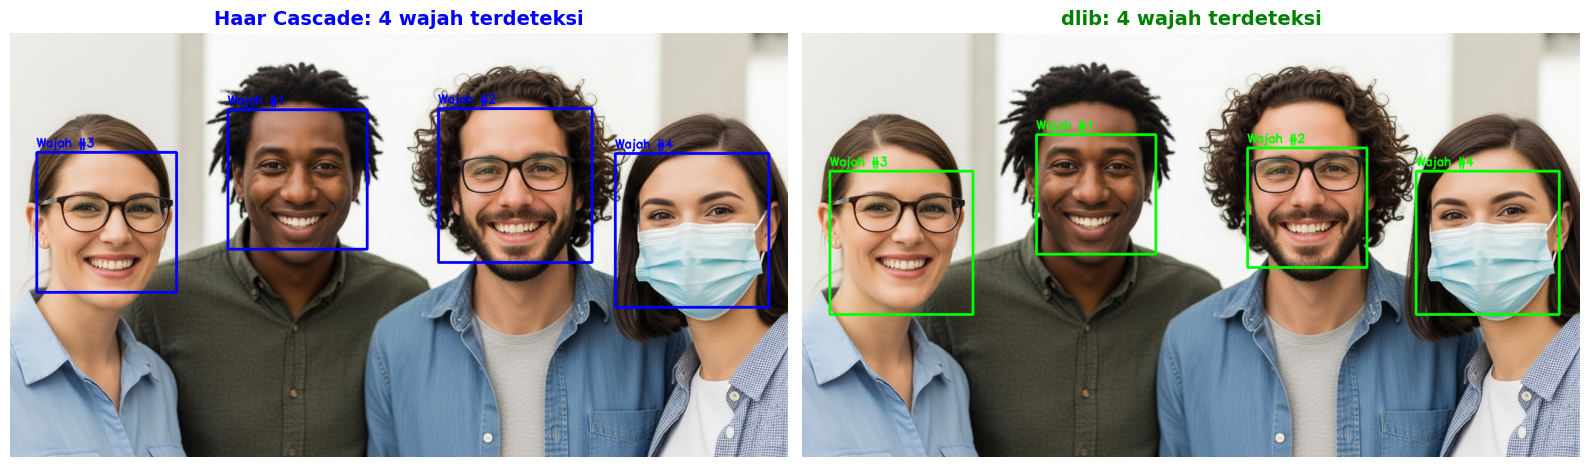


ANALISIS PERBANDINGAN METODE DETEKSI
📊 STATISTIK DETEKSI:
   • Haar Cascade: 4 wajah
   • dlib        : 4 wajah
   → Kedua metode mendeteksi jumlah wajah yang sama

🔍 KARAKTERISTIK:
   Haar Cascade:
   • Cepat dan ringan
   • Bisa over-detect (false positive)

   dlib:
   • Lebih akurat
   • Lebih selektif (fewer false positives)


In [30]:
# ========================================
# VISUALISASI PERBANDINGAN
# ========================================

# Convert images to RGB for matplotlib display
img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_haar_rgb = cv2.cvtColor(img_haar, cv2.COLOR_BGR2RGB)
img_dlib_rgb = cv2.cvtColor(img_dlib, cv2.COLOR_BGR2RGB)

# Create comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Hasil Haar Cascade
axes[0].imshow(img_haar_rgb)
axes[0].set_title(f"Haar Cascade: {len(faces_haar)} wajah terdeteksi", 
                     fontsize=14, fontweight='bold', color='blue')
axes[0].axis("off")

# Hasil dlib
axes[1].imshow(img_dlib_rgb)
axes[1].set_title(f"dlib: {len(faces_dlib)} wajah terdeteksi", 
                     fontsize=14, fontweight='bold', color='green')
axes[1].axis("off")

plt.tight_layout()
plt.show()

# ========================================
# ANALISIS PERBANDINGAN
# ========================================
print("\n" + "="*60)
print("ANALISIS PERBANDINGAN METODE DETEKSI")
print("="*60)

print(f"📊 STATISTIK DETEKSI:")
print(f"   • Haar Cascade: {len(faces_haar)} wajah")
print(f"   • dlib        : {len(faces_dlib)} wajah")

if len(faces_haar) > len(faces_dlib):
    print(f"   → Haar Cascade mendeteksi {len(faces_haar) - len(faces_dlib)} wajah lebih banyak")
elif len(faces_dlib) > len(faces_haar):
    print(f"   → dlib mendeteksi {len(faces_dlib) - len(faces_haar)} wajah lebih banyak")
else:
    print(f"   → Kedua metode mendeteksi jumlah wajah yang sama")

print(f"\n🔍 KARAKTERISTIK:")
print(f"   Haar Cascade:")
print(f"   • Cepat dan ringan")
print(f"   • Bisa over-detect (false positive)")
print(f"\n   dlib:")
print(f"   • Lebih akurat")
print(f"   • Lebih selektif (fewer false positives)")
print("="*60)

In [31]:
import bz2

File model sudah ada.


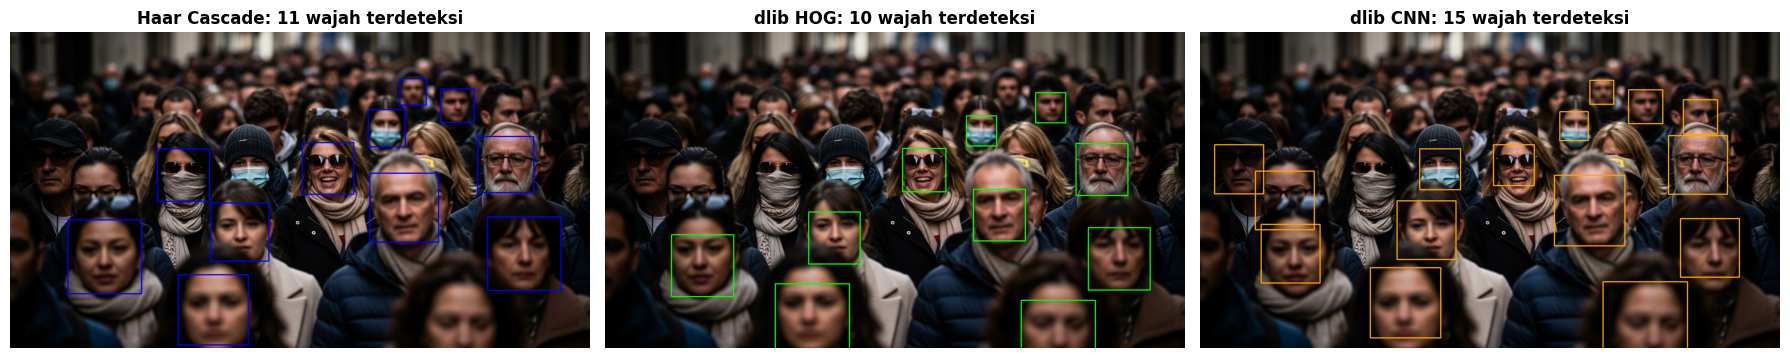

In [32]:
# Mencoba dlib CNN dan perbandingannya
multiple2_path = os.path.join(os.getcwd(), 'data', 'multiple2.png')
img_multiple2 = cv2.imread(multiple2_path)

# Convert the image to grayscale for Haar Cascade and dlib HOG
gray_multiple2 = cv2.cvtColor(img_multiple2, cv2.COLOR_BGR2GRAY)

# HAAR CASCADE
faces_haar_multiple2 = face_cascade.detectMultiScale(
    gray_multiple2, 
    scaleFactor=1.1, 
    minNeighbors=5, 
    minSize=(30, 30)
)

img_haar_multiple2 = img_multiple2.copy()
for (x, y, w, h) in faces_haar_multiple2:
    cv2.rectangle(img_haar_multiple2, (x, y), (x + w, y + h), (255, 0, 0), 2)

# DLIB HOG
faces_dlib_hog_multiple2 = detector(gray_multiple2)

img_dlib_hog_multiple2 = img_multiple2.copy()
for face in faces_dlib_hog_multiple2:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    cv2.rectangle(img_dlib_hog_multiple2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# DLIB CNN
cnn_model_path = os.path.join(os.getcwd(), 'mmod_human_face_detector.dat')
if not os.path.isfile(cnn_model_path):
    print("File model tidak ditemukan, mengunduh...")
    url = "https://github.com/davisking/dlib-models/raw/master/mmod_human_face_detector.dat.bz2"
    bz2_path = os.path.join(os.getcwd(), 'mmod_human_face_detector.dat.bz2')

    r = requests.get(url, stream=True)
    with open(bz2_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download selesai, ekstrak file...")

    with bz2.open(bz2_path, 'rb') as input_file:
        with open(cnn_model_path, 'wb') as output_file:
            output_file.write(input_file.read())
    print("Ekstrak selesai.")

    os.remove(bz2_path)
else:
    print("File model sudah ada.")

cnn_face_detector = dlib.cnn_face_detection_model_v1(cnn_model_path)
faces_dlib_cnn_multiple2 = cnn_face_detector(img_multiple2, 1)


img_dlib_cnn_multiple2 = img_multiple2.copy()
for face in faces_dlib_cnn_multiple2:
    x, y, w, h = (face.rect.left(), face.rect.top(), face.rect.width(), face.rect.height())
    cv2.rectangle(img_dlib_cnn_multiple2, (x, y), (x + w, y + h), (0, 165, 255), 2)

# VISUALIZATION
img_haar_rgb = cv2.cvtColor(img_haar_multiple2, cv2.COLOR_BGR2RGB)
img_dlib_hog_rgb = cv2.cvtColor(img_dlib_hog_multiple2, cv2.COLOR_BGR2RGB)
img_dlib_cnn_rgb = cv2.cvtColor(img_dlib_cnn_multiple2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(img_haar_rgb)
axes[0].set_title(f"Haar Cascade: {len(faces_haar_multiple2)} wajah terdeteksi", fontsize=12, fontweight='bold')
axes[0].axis("off")

axes[1].imshow(img_dlib_hog_rgb)
axes[1].set_title(f"dlib HOG: {len(faces_dlib_hog_multiple2)} wajah terdeteksi", fontsize=12, fontweight='bold')
axes[1].axis("off")

axes[2].imshow(img_dlib_cnn_rgb)
axes[2].set_title(f"dlib CNN: {len(faces_dlib_cnn_multiple2)} wajah terdeteksi", fontsize=12, fontweight='bold')
axes[2].axis("off")

plt.tight_layout()
plt.show()

# Referensi Belajar & Tuning Menggunakan Google Gemini:   
https://gemini.google.com/share/b32bff3ffb42